In [202]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Type is: <class 'numpy.ndarray'>
size is: (716, 948, 3)


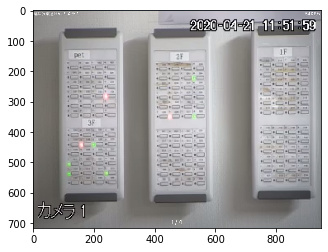

In [204]:
image = cv2.imread('hotel_1.jpg')
image_rgb = np.copy(image)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Print type and shape
print('Type is:', type(image))
print('size is:', image.shape)

# Show image
plt.imshow(image_rgb);

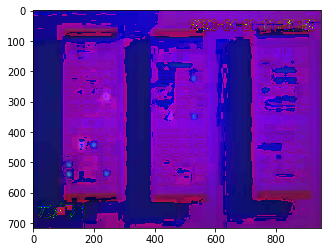

In [205]:
# Convert to HSV for analyzing
image_hsv = np.copy(image)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.imshow(image_hsv);

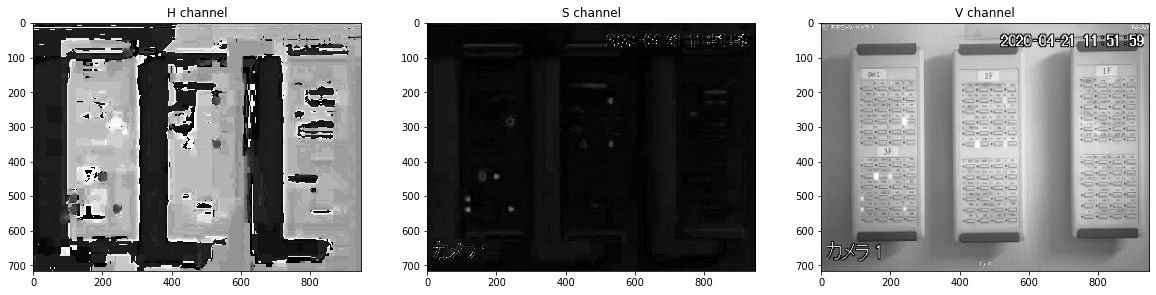

In [178]:
# Visualize the individual color channels
h = image_hsv[:,:,0]
s = image_hsv[:,:,1]
v = image_hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

In [206]:
# Create red color threshold for lower red values
lower_red = np.array([0, 10, 240])
upper_red = np.array([30, 255, 255])

# Create red mask for lower red values
red_mask1 = cv2.inRange(image_hsv, lower_red, upper_red)

# Create red color threshold for higher red values
lower_red = np.array([160, 10, 240])
upper_red = np.array([180, 255, 255])

# Create red mask for higher red values
red_mask2 = cv2.inRange(image_hsv, lower_red, upper_red)

# Combine masks to get full red spectrum
red_mask = red_mask1 + red_mask2

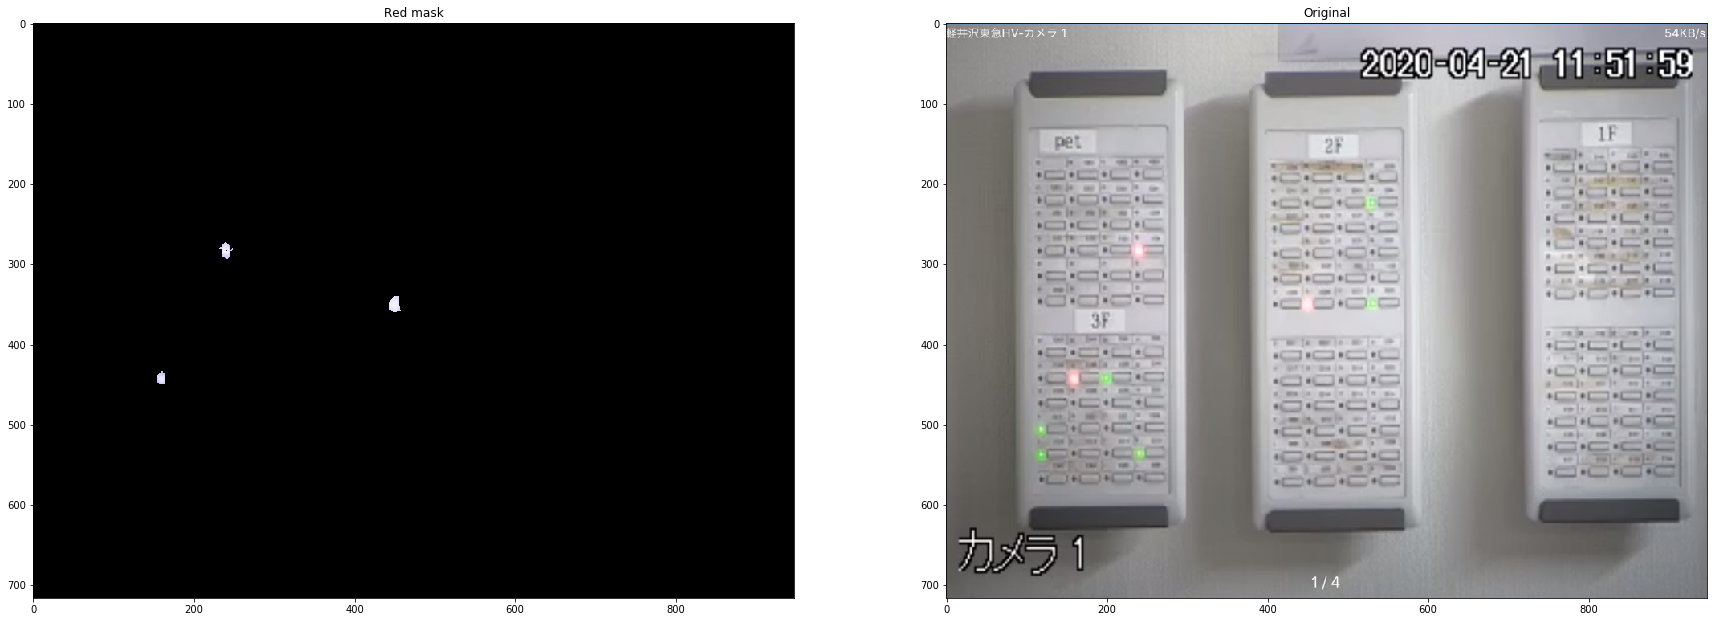

In [207]:
# Pick out the red lights and show where they are detected
output_img = np.copy(image)
output_img[np.where(red_mask == 0)] = 0

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,20))
ax1.set_title('Red mask')
ax1.imshow(output_img)
ax2.set_title('Original')
ax2.imshow(image_rgb)

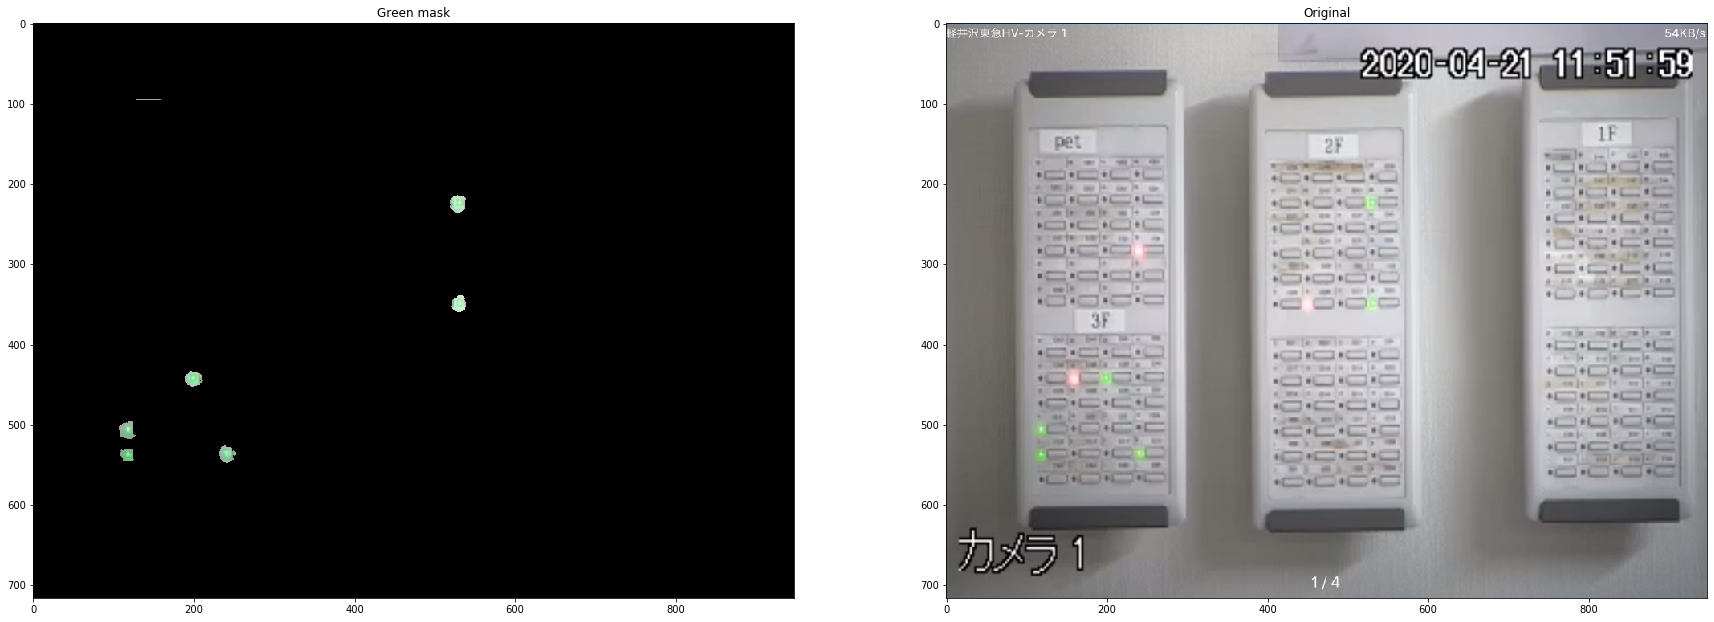

In [208]:
# Create green color threshold and mask
lower_green = np.array([30, 20, 160])
upper_green = np.array([80, 255, 255])
green_mask = cv2.inRange(image_hsv, lower_green, upper_green)

# Pick out the green lights and show where they are detected
output_img = np.copy(image)
output_img[np.where(green_mask == 0)] = 0

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,20))
ax1.set_title('Green mask')
ax1.imshow(output_img)
ax2.set_title('Original')
ax2.imshow(image_rgb)